In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.io.wavfile import read
import scipy.io

# script importing
from peak_picking import *
from pca import *

# data loading
mat = scipy.io.loadmat(
    'data/isoint/isoint_2kHz_Level_20dB_TM45130.mat')

# NOT EVENLY SPACED!!!
fvect = mat['frekax'].flatten()  # frequency axis
Y = mat['Y'].flatten() # BM deviation
Yme = mat['Yme'].flatten() # stapes deviation
transfer_fcn = Y/Yme

freq_range = np.size(fvect)  # maximum index on the frequency axis


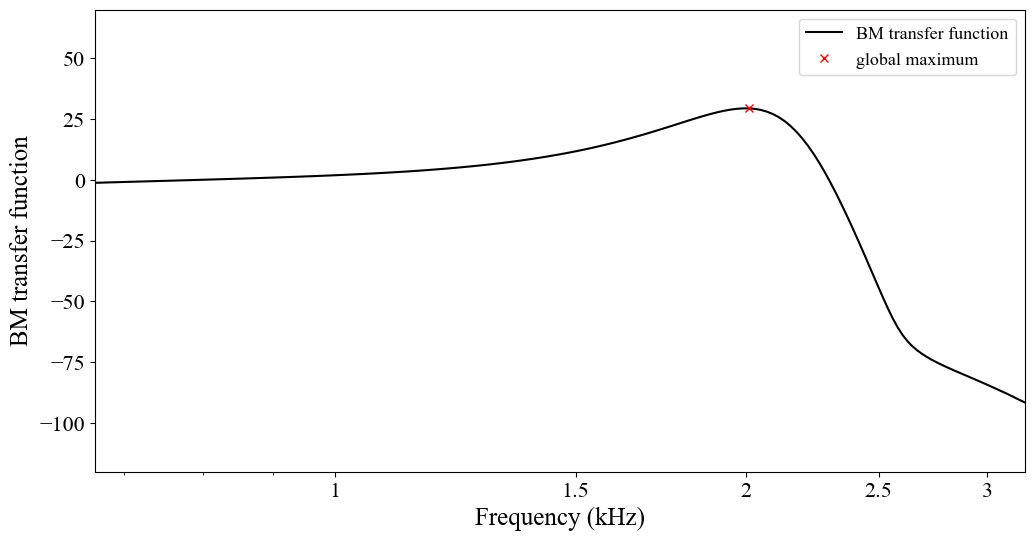

In [16]:
from matplotlib.ticker import FixedLocator, FixedFormatter

# sound wave in decibels
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(fvect/1000, 20*np.log10(np.abs(transfer_fcn)), 'k', label='BM transfer function')

maximum = findGlobalMaximum(np.real(20*np.log10(np.abs(transfer_fcn))))
ax.plot(fvect[maximum]/1000, 20 *
        np.log10(np.abs(transfer_fcn)[maximum]), "rx", label='global maximum')

ax.set_xscale('log')

x_ticks = [1, 1.5, 2, 2.5, 3, 3.5]
ax.xaxis.set_major_locator(FixedLocator(x_ticks))
ax.xaxis.set_major_formatter(FixedFormatter(x_ticks))
ax.tick_params(axis='both', which='major', labelsize=16)

ax.set_xlim([fvect[0]/1000, fvect[-1]/1000])
ax.set_ylim([-120, 70])
ax.set_xlabel('Frequency (kHz)', fontdict={"fontsize": 18})
ax.set_ylabel('BM transfer function', fontdict={"fontsize": 18})
ax.legend(fontsize=13)
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()
